<a href="https://colab.research.google.com/github/Pepcoders/Data-Science-December/blob/main/22-04-04-DL_Intro/Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

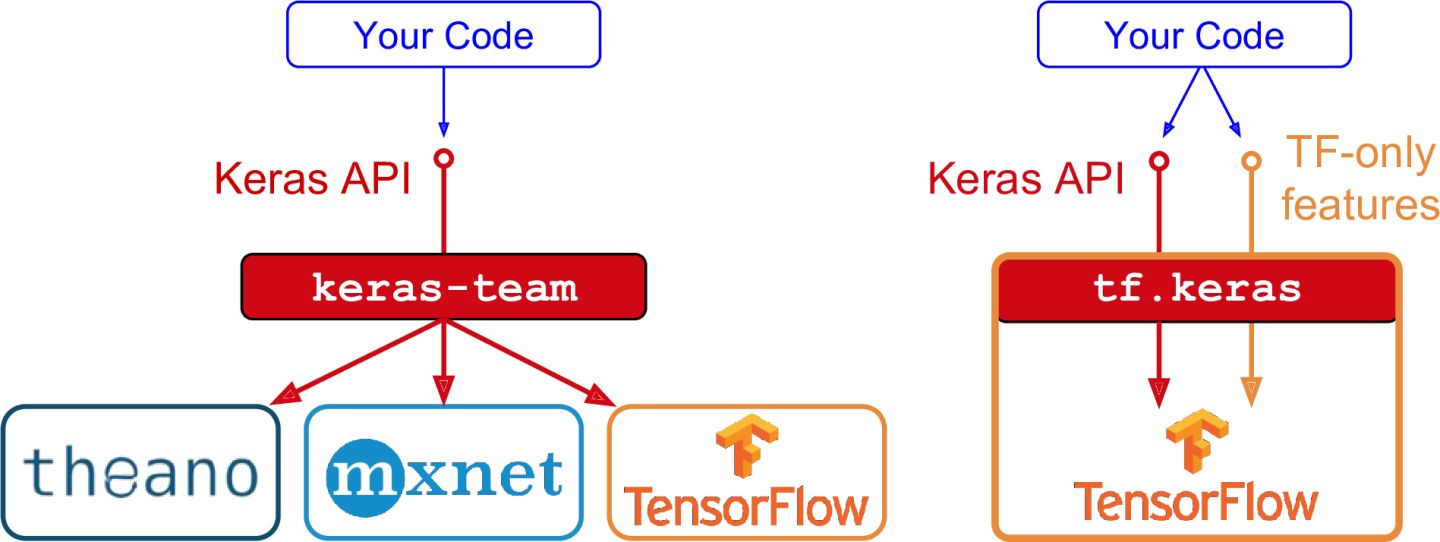

In [18]:
import tensorflow as tf

print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Tensorflow version: 2.8.0
Keras version: 2.8.0


# Fashion MNIST

In [19]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(xtrain, ytrain), (xval, yval) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [20]:
xtrain.shape, ytrain.shape

((60000, 28, 28), (60000,))

In [21]:
import numpy as np
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

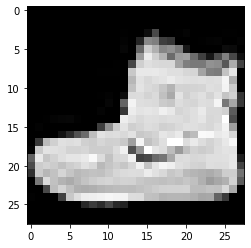

In [22]:
import matplotlib.pyplot as plt

plt.imshow(xtrain[0], cmap='gray')
plt.show()

Creating Model



*   Sequential API
*   Function API
*   Sub-class API



In [ ]:
model = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(input_shape = (28, 28)),
            tf.keras.layers.Dense(300, activation='relu'),
            tf.keras.layers.Dense(100, activation='relu'),
            tf.keras.layers.Dense(10, activation='softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape = (28, 28)))
model.add(tf.keras.layers.Dense(300, activation='relu')),
model.add(tf.keras.layers.Dense(100, activation='relu')),
model.add(tf.keras.layers.Dense(10, activation='softmax')),

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## Function API

In [3]:
def square(x):
  return x*x

def add_2(a):
    return a+2

n = 4
n = square(n)
n = add_2(n)
print(n)

18

In [8]:
encoder_input = tf.keras.Input(shape=(28, 28), name="img")

x = tf.keras.layers.Dense(300, activation="relu")(encoder_input)
x = tf.keras.layers.Dense(100, activation="relu")(x)
encoder_output = tf.keras.layers.Dense(1)(x)

encoder = tf.keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28)]          0         
                                                                 
 dense_1 (Dense)             (None, 28, 300)           8700      
                                                                 
 dense_2 (Dense)             (None, 28, 100)           30100     
                                                                 
 dense_3 (Dense)             (None, 28, 1)             101       
                                                                 
Total params: 38,901
Trainable params: 38,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
    )

In [ ]:
history = model.fit(xtrain, ytrain, validation_split=0.3, epochs=10)

Epoch 1/10
1313/1313 [==============================] - 7s 5ms/step - loss: 3.4710 - accuracy: 0.7504 - val_loss: 0.7936 - val_accuracy: 0.7711
Epoch 2/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.6142 - accuracy: 0.8093 - val_loss: 0.6757 - val_accuracy: 0.7832
Epoch 3/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.5378 - accuracy: 0.8180 - val_loss: 0.5691 - val_accuracy: 0.8154
Epoch 4/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.5135 - accuracy: 0.8224 - val_loss: 0.5182 - val_accuracy: 0.8198
Epoch 5/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.4807 - accuracy: 0.8325 - val_loss: 0.4782 - val_accuracy: 0.8384
Epoch 6/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.4533 - accuracy: 0.8389 - val_loss: 0.4706 - val_accuracy: 0.8381
Epoch 7/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.4270 - accuracy: 0.8478 - val_loss: 0.4770 - val_accuracy:

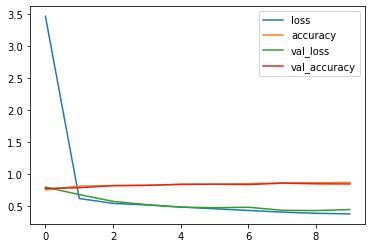

In [ ]:
import pandas as pd

df = pd.DataFrame(history.history)

df.plot()

In [ ]:
# model(xval)
model.predict(xval)

array([[1.5667693e-09, 3.1511908e-13, 6.1326844e-08, ..., 1.4464093e-02,
        2.2786678e-06, 8.2509160e-01],
       [5.0247763e-06, 9.8635952e-12, 9.9449182e-01, ..., 7.8562380e-27,
        5.0353276e-07, 6.9757758e-16],
       [2.2387558e-10, 1.0000000e+00, 1.2888113e-13, ..., 0.0000000e+00,
        5.3826880e-18, 4.8712405e-20],
       ...,
       [1.0893958e-06, 2.2901383e-09, 5.0671806e-05, ..., 3.4679178e-12,
        9.9676239e-01, 1.1891212e-13],
       [7.1758266e-05, 9.9975806e-01, 4.7298165e-08, ..., 1.3741518e-27,
        6.9661044e-10, 5.0501310e-14],
       [2.4322100e-02, 4.5165105e-04, 1.1793016e-02, ..., 1.6231430e-01,
        2.3572361e-02, 3.7336495e-02]], dtype=float32)

# Custom Fit Function

## GradientTape

Resource
https://www.tensorflow.org/api_docs/python/tf/GradientTape

In [ ]:
import tensorflow as tf

In [ ]:
def f(w1, w2):
    return 3*w1**2 + 5*w1*w2

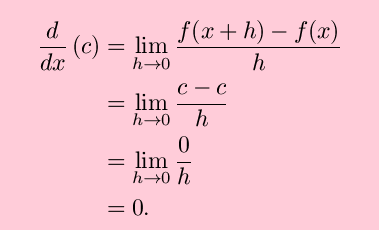

In [ ]:
w1 = 3
w2 = 5

eps = 1e-7
print('Diff w1: ', (f(w1+eps, w2) - f(w1, w2)) / eps)
print('Diff w2: ', (f(w1, w2+eps) - f(w1, w2)) / eps)

Diff w1:  43.00000028933937
Diff w2:  15.000000104237188


In [ ]:
w1 = tf.Variable(3.0)
w2 = tf.Variable(5.0)

with tf.GradientTape() as g:
    loss = f(w1, w2)
g.gradient(loss, [w1, w2])

[<tf.Tensor: shape=(), dtype=float32, numpy=43.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=15.0>]

## custom training

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape = (28, 28)))
model.add(tf.keras.layers.Dense(300, activation='relu')),
model.add(tf.keras.layers.Dense(100, activation='relu')),
model.add(tf.keras.layers.Dense(10, activation='softmax')),

model.summary()

In [ ]:
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

In [ ]:
# Prepare the training dataset.
batch_size = 32
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Reserve 10,000 samples for validation.
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

# Prepare the training dataset.
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

# Prepare the validation dataset.
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.batch(batch_size)

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
epochs = 2

for epoch in range(1, epochs+1):
    print('Epoch No:', epoch)
    for x_train_batch, y_train_batch in train_dataset:
        with tf.GradientTape() as g:
            y_pred = model(x_train_batch)
            ls = loss(y_train_batch, y_pred)
        grads = g.gradient(ls, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

In [ ]:
# Prepare the metrics.
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

epochs = 2

for epoch in range(1, epochs+1):
    print('Epoch No:', epoch)
    for x_train_batch, y_train_batch in train_dataset:
        with tf.GradientTape() as g:
            y_pred = model(x_train_batch)
            ls = loss(y_train_batch, y_pred)
        grads = g.gradient(ls, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))
        t
        train_acc_metric.update_state(y_train_batch, y_pred)
    print('Accuracy:', train_acc_metric.result())
    train_acc_metric.reset_states()

Epoch No: 1
Accuracy: tf.Tensor(0.83024, shape=(), dtype=float32)
Epoch No: 2
Accuracy: tf.Tensor(0.84006, shape=(), dtype=float32)


# Deep Network Problems

## Vanishing Exploding

https://keras.io/api/layers/initializers/

In [17]:
model = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(input_shape = (28, 28)),
            tf.keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal'),
            tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
            tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='glorot_normal'),
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 300)               235500    
                                                                 
 dense_18 (Dense)            (None, 100)               30100     
                                                                 
 dense_19 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## Activation Function

https://keras.io/api/layers/activations/

In [ ]:
model = tf.keras.models.Sequential([
          tf.keras.layers.Flatten(input_shape = (28, 28)),
          tf.keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal'),
          tf.keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
          tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='glorot_normal'),
])
model.summary()